In [1]:
import numpy as np
import pandas as pd

In [2]:
# download the dataset from Kaggle
!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation -p ../Data

Dataset URL: https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation
License(s): CC-BY-NC-SA-4.0
100% 714M/714M [00:18<00:00, 43.0MB/s]
100% 714M/714M [00:18<00:00, 40.2MB/s]


In [ ]:
# unzip the dataset
!unzip ../Data/lgg-mri-segmentation.zip -d ../Data

In [4]:
import os
import cv2 as cv

dataset_path = "/Data/kaggle_3m"

data = []

for patient_folder in sorted(os.listdir(dataset_path)):
    patient_path = os.path.join(dataset_path, patient_folder)

    if os.path.isdir(patient_path):

        for filename in sorted(os.listdir(patient_path)):
            if filename.endswith(".tif") and not filename.endswith("_mask.tif"):
                image_path = os.path.join(patient_folder, filename)
                mask_filename = filename.replace(".tif", "_mask.tif")
                mask_path = os.path.join(patient_folder, mask_filename)
                mask_full_path = os.path.join(patient_path, mask_filename)

                if os.path.exists(mask_full_path):
                    mask_image = cv.imread(mask_full_path, cv.IMREAD_GRAYSCALE)

                    mask = 1 if mask_image is not None and mask_image.max() > 0 else 0
                else:
                    mask = 0
                data.append([patient_folder, image_path, mask_path, mask])

brain_tumor_dataset = pd.DataFrame(data, columns = ["patient_id", "image_path", "mask_path", "mask"])
# df.to_csv("brain_tumor_dataset.csv", index=False)
brain_tumor_dataset

,patient_id,image_path,mask_path,mask
0,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...,0
1,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_10...,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_10...,0
2,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11...,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11...,1
3,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_12...,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_12...,1
4,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_13...,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_13...,1
...,...,...,...,...
3924,TCGA_HT_A61B_19991127,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_85...,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_85...,0
3925,TCGA_HT_A61B_19991127,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...,0
3926,TCGA_HT_A61B_19991127,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...,0
3927,TCGA_HT_A61B_19991127,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...,0


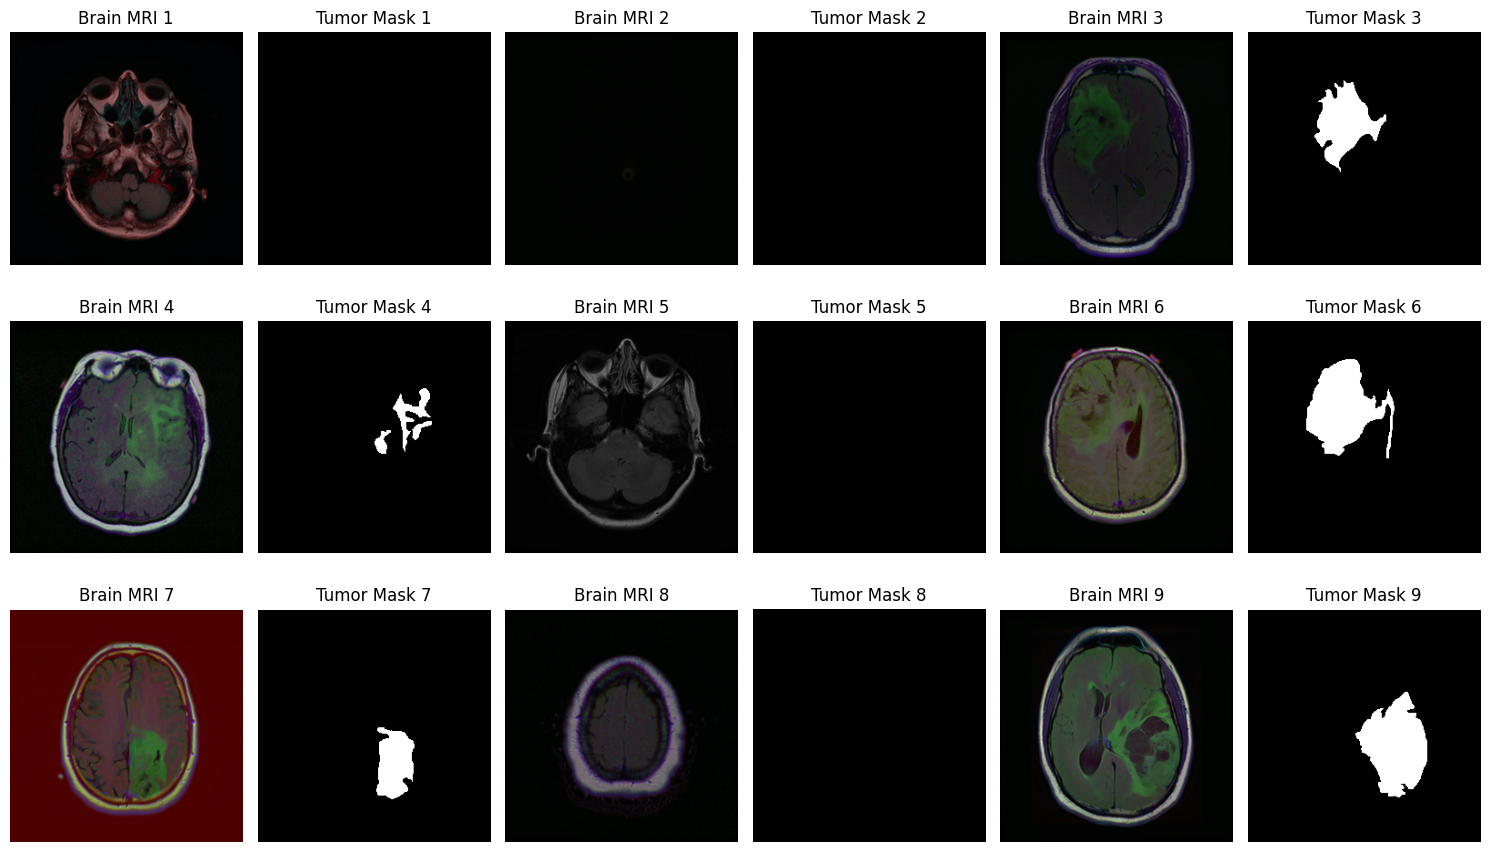

In [5]:
import matplotlib.pyplot as plt
import random
from PIL import Image

DATASET_PATH = "/Data/kaggle_3m"

num_samples = 9

rows = num_samples // 3
cols = 3 * 2

sampled_df = brain_tumor_dataset.sample(num_samples, random_state = 42)

fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))

for i, (_, row) in enumerate(sampled_df.iterrows()):

    image_path = f"{DATASET_PATH}/{row['image_path']}"
    mask_path = f"{DATASET_PATH}/{row['mask_path']}"

    image = Image.open(image_path)
    mask = Image.open(mask_path)

    ax_img = axes[i // 3, (i % 3) * 2]
    ax_img.imshow(image, cmap='gray')
    ax_img.set_title(f"Brain MRI {i + 1}")
    ax_img.axis("off")

    ax_mask = axes[i // 3, (i % 3) * 2 + 1]
    ax_mask.imshow(mask, cmap='gray')
    ax_mask.set_title(f"Tumor Mask {i + 1}")
    ax_mask.axis("off")

plt.tight_layout()
plt.show()

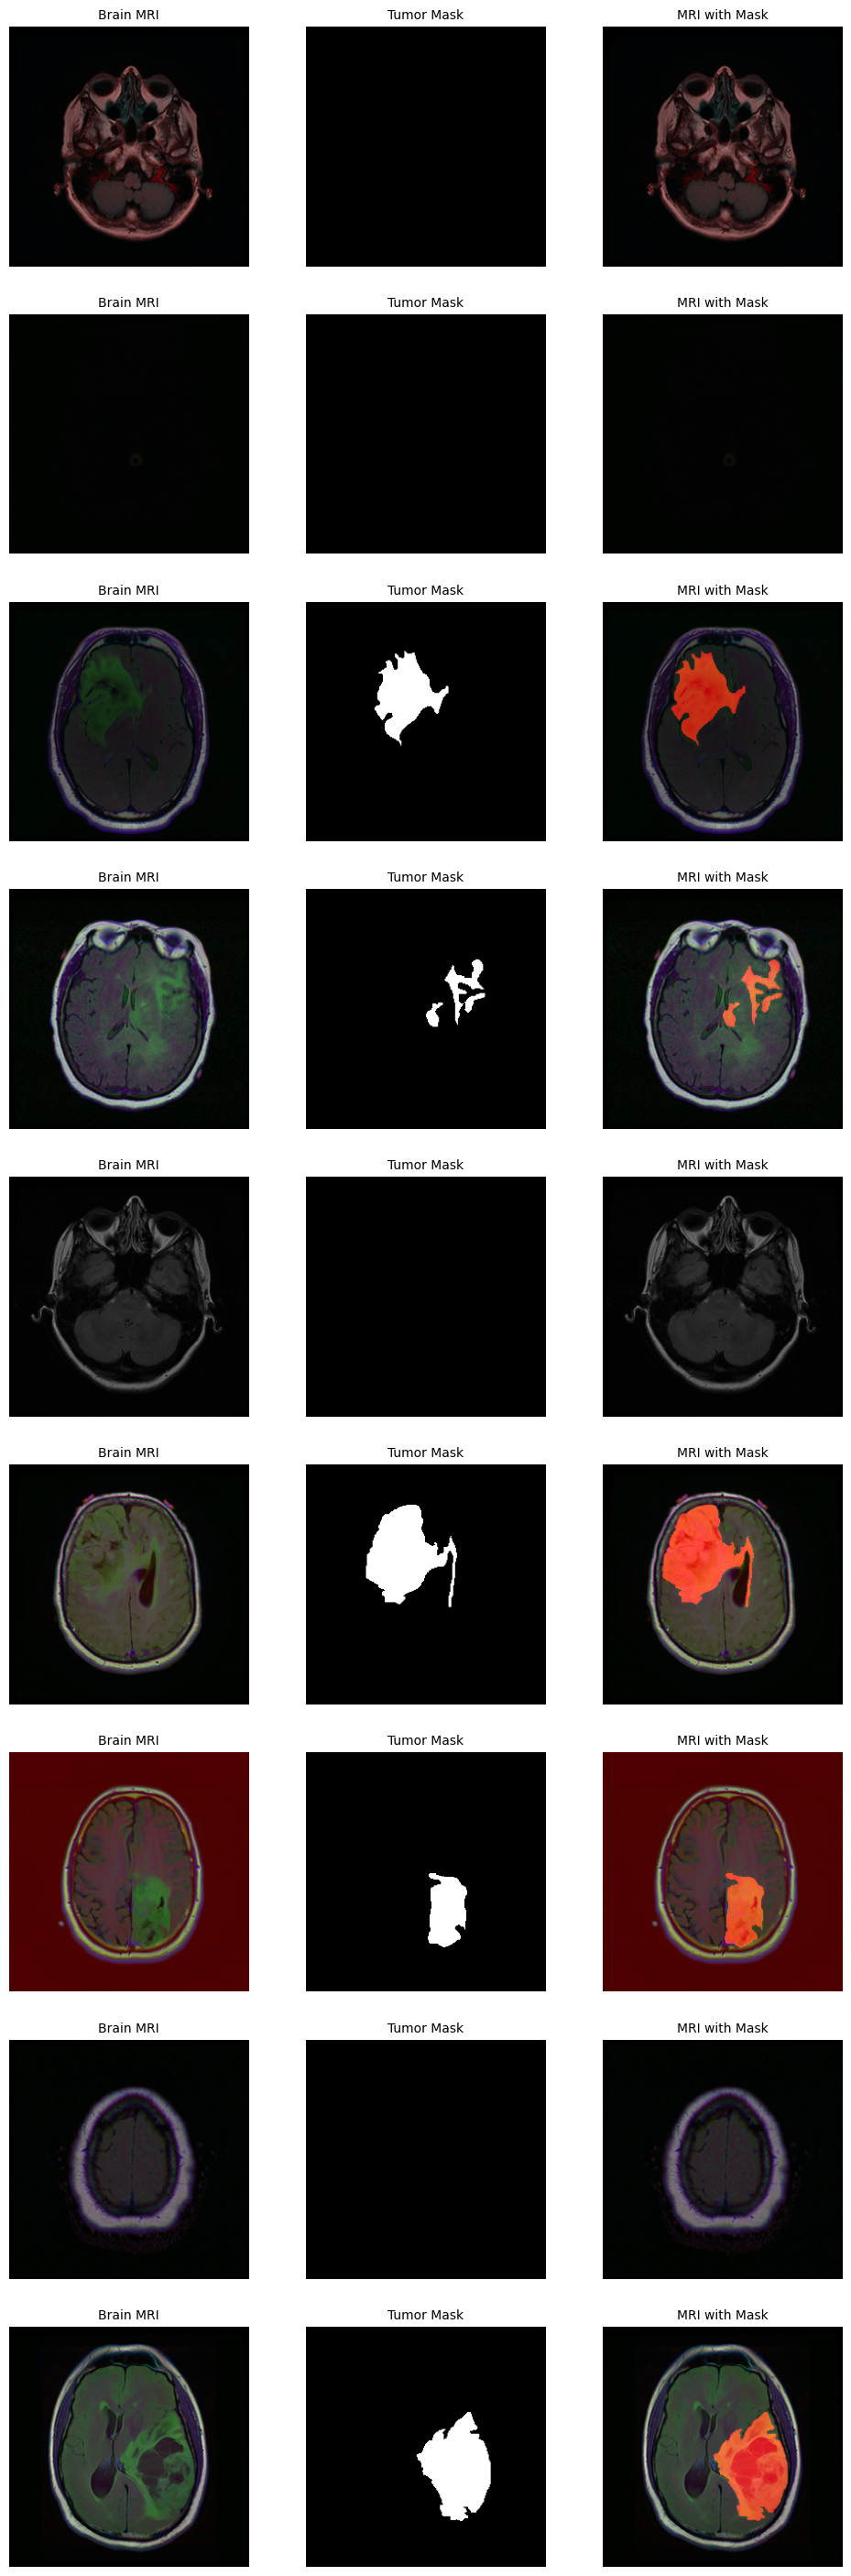

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

DATASET_PATH = "/Data/kaggle_3m"

num_samples = 9

rows = num_samples
cols = 3

sampled_df = brain_tumor_dataset.sample(num_samples, random_state = 42)

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))

for i, (_, row) in enumerate(sampled_df.iterrows()):

    image_path = f"{DATASET_PATH}/{row['image_path']}"
    mask_path = f"{DATASET_PATH}/{row['mask_path']}"

    image = Image.open(image_path)
    mask = Image.open(mask_path).convert("L")

    image_colored = np.array(image)
    mask_array = np.array(mask)

    red_mask = np.zeros_like(image_colored)
    red_mask[:, :, 0] = mask_array

    overlay = np.clip(image_colored + red_mask * 0.7, 0, 255).astype(np.uint8)

    ax_img = axes[i, 0]
    ax_img.imshow(image)
    ax_img.set_title("Brain MRI", fontsize=10)
    ax_img.axis("off")

    ax_mask = axes[i, 1]
    ax_mask.imshow(mask, cmap='gray')
    ax_mask.set_title("Tumor Mask", fontsize=10)
    ax_mask.axis("off")

    ax_overlay = axes[i, 2]
    ax_overlay.imshow(overlay)
    ax_overlay.set_title("MRI with Mask", fontsize=10)
    ax_overlay.axis("off")

plt.subplots_adjust(wspace=0.15, hspace=0.2)

plt.show()

In [17]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(brain_tumor_dataset, test_size=0.15, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.15, random_state=42)

In [18]:
import numpy as np
import cv2
import os
from tensorflow.keras.utils import Sequence

class BrainTumorGenerator(Sequence):
    def __init__(self, dataframe, batch_size=16, img_size=256, shuffle=True):
        super().__init__()
        self.dataframe = dataframe
        self.batch_size = batch_size
        self.img_size = img_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.dataframe) / self.batch_size))

    def __getitem__(self, index):
        batch_data = self.dataframe.iloc[index * self.batch_size:(index + 1) * self.batch_size]
        images, masks = self.__data_generation(batch_data)
        return images, masks

    def __data_generation(self, batch_data):
        images = []
        masks = []

        for _, row in batch_data.iterrows():
            img_path = os.path.join(dataset_path, row["image_path"])
            mask_path = os.path.join(dataset_path, row["mask_path"])

            assert os.path.exists(img_path), f"Image path does not exist: {img_path}"
            assert os.path.exists(mask_path), f"Mask path does not exist: {mask_path}"

            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (self.img_size, self.img_size)) / 255.0

            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            mask = cv2.resize(mask, (self.img_size, self.img_size))
            mask = mask.astype(np.float32) / 255.0

            images.append(img)
            masks.append(mask.reshape(self.img_size, self.img_size, 1))

        return np.array(images), np.array(masks)

    def on_epoch_end(self):
        if self.shuffle:
            self.dataframe = self.dataframe.sample(frac=1).reset_index(drop=True)


train_gen = BrainTumorGenerator(train_df, batch_size=16)
val_gen = BrainTumorGenerator(val_df, batch_size=16)
test_gen = BrainTumorGenerator(test_df, batch_size=16, shuffle=False)

In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout

IMG_SIZE = 256

def unet_model(input_size=(IMG_SIZE, IMG_SIZE, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)

    # Decoder
    u5 = UpSampling2D((2, 2))(c4)
    u5 = concatenate([u5, c3])
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(u5)
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(c5)

    u6 = UpSampling2D((2, 2))(c5)
    u6 = concatenate([u6, c2])
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c1])
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(c7)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c7)

    return Model(inputs, outputs)

model = unet_model()

In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_30 (Conv2D)        │ (None, 256, 256, 64)   │          1,792 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_31 (Conv2D)        │ (None, 256, 256, 64)   │         36,928 │ conv2d_30[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 128, 128, 64)   │              0 │ conv2d_31[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_32 (Conv2D)        │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_33 (Conv2D)        │ (None, 128, 128, 128)  │        147,584 │ conv2d_32[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 64, 64, 128)    │              0 │ conv2d_33[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_34 (Conv2D)        │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_35 (Conv2D)        │ (None, 64, 64, 256)    │        590,080 │ conv2d_34[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 32, 32, 256)    │              0 │ conv2d_35[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_36 (Conv2D)        │ (None, 32, 32, 512)    │      1,180,160 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_37 (Conv2D)        │ (None, 32, 32, 512)    │      2,359,808 │ conv2d_36[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_6           │ (None, 64, 64, 512)    │              0 │ conv2d_37[0][0]        │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_6             │ (None, 64, 64, 768)    │              0 │ up_sampling2d_6[0][0], │
│ (Concatenate)             │                        │                │ conv2d_35[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_38 (Conv2D)        │ (None, 64, 64, 256)    │      1,769,728 │ concatenate_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_39 (Conv2D)        │ (None, 64, 64, 256)    │        590,080 │ conv2d_38[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_7      

 Total params: 7,782,913 (29.69 MB)

 Trainable params: 7,782,913 (29.69 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor = 'val_loss',
        patience = 3,
        restore_best_weights=True,
        verbose = 1
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath = "best_brain_tumor_model.keras",
        monitor = "val_loss",
        save_best_only = True,
        verbose = 1
    )
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs = 5,
    verbose = 1,
    callbacks=callbacks
)

Epoch 1/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.9656 - loss: 0.0859
Epoch 1: val_loss improved from inf to 0.02738, saving model to best_brain_tumor_model.keras
208/208 ━━━━━━━━━━━━━━━━━━━━ 149s 684ms/step - accuracy: 0.9657 - loss: 0.0857 - val_accuracy: 0.9916 - val_loss: 0.0274
Epoch 2/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 638ms/step - accuracy: 0.9901 - loss: 0.0315
Epoch 2: val_loss improved from 0.02738 to 0.02416, saving model to best_brain_tumor_model.keras
208/208 ━━━━━━━━━━━━━━━━━━━━ 197s 676ms/step - accuracy: 0.9901 - loss: 0.0315 - val_accuracy: 0.9934 - val_loss: 0.0242
Epoch 3/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.9924 - loss: 0.0253
Epoch 3: val_loss improved from 0.02416 to 0.02207, saving model to best_brain_tumor_model.keras
208/208 ━━━━━━━━━━━━━━━━━━━━ 143s 687ms/step - accuracy: 0.9924 - loss: 0.0253 - val_accuracy: 0.9937 - val_loss: 0.0221
Epoch 4/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.9924 - loss: 0.0243
Ep

In [23]:
from tensorflow.keras.models import load_model

best_model = load_model("best_brain_tumor_model.keras")

val_loss, val_accuracy = best_model.evaluate(val_gen, verbose=1)
print(f"Validation Accuracy: {val_accuracy:.4f}")

test_loss, test_accuracy = best_model.evaluate(test_gen, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 231ms/step - accuracy: 0.9935 - loss: 0.0210
Validation Accuracy: 0.9941
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - accuracy: 0.9912 - loss: 0.0268
Test Accuracy: 0.9910


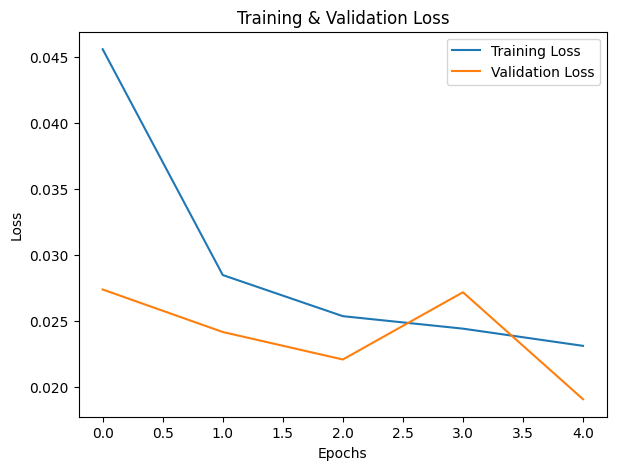

In [38]:
import matplotlib.pyplot as plt

history_dict = history.history

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()

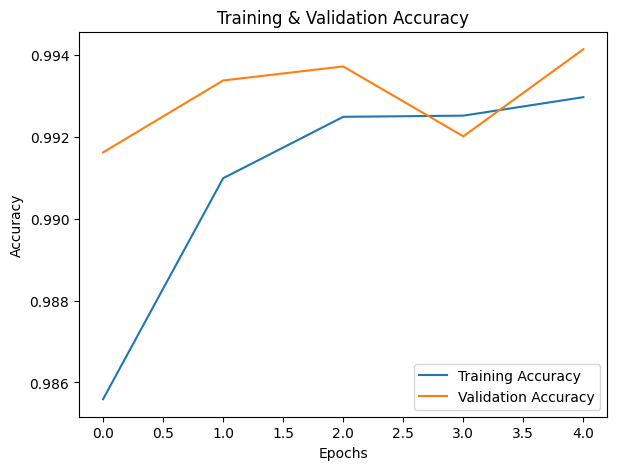

In [37]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.show()